# Exercise 3:  Cross-validation as resampling techniques, adding more complexity (score 15 points)


### Exercise 3:  Cross-validation as resampling techniques, adding more complexity (score 15 points)

The aim here is to write your own code for another widely popular
resampling technique, the so-called cross-validation method.  Again,
before you start with cross-validation approach, you should scale your
data.

Implement the $k$-fold cross-validation algorithm (write your own
code) and evaluate again the MSE function resulting
from the test folds. You can compare your own code with that from
**Scikit-Learn** if needed. 

Compare the MSE you get from your cross-validation code with the one
you got from your **bootstrap** code. Comment your results. Try $5-10$
folds.  You can also compare your own cross-validation code with the
one provided by **Scikit-Learn**.


Looping trhough polynomials up to 14 with 20: 100%|██████████| 14/14 [00:05<00:00,  2.68it/s]


Elapsed time 5236.7249ms in function bootstrap


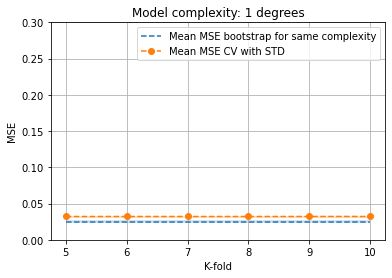

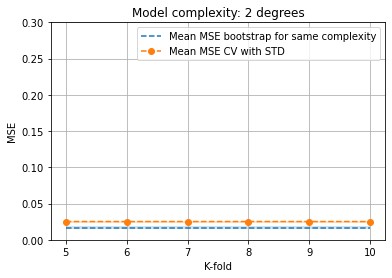

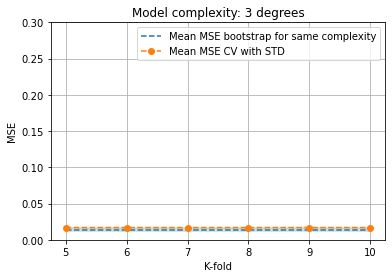

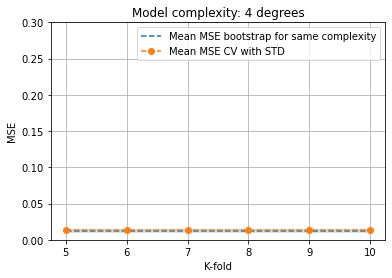

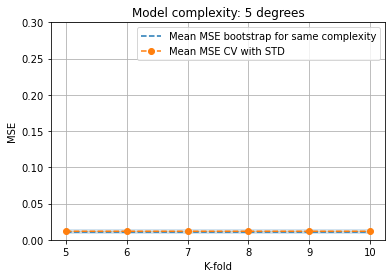

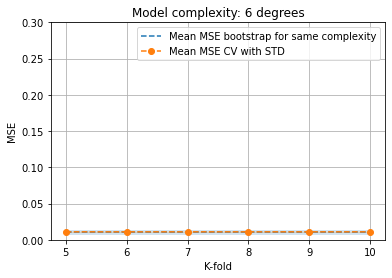

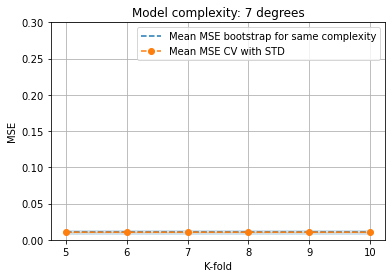

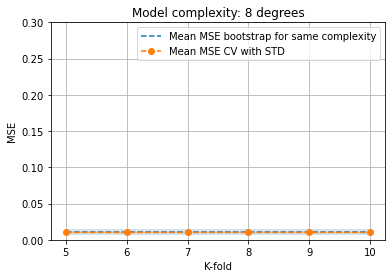

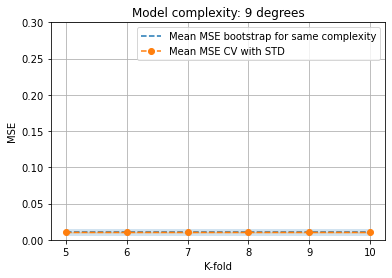

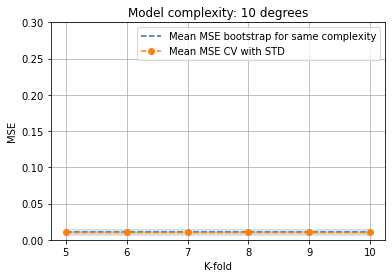

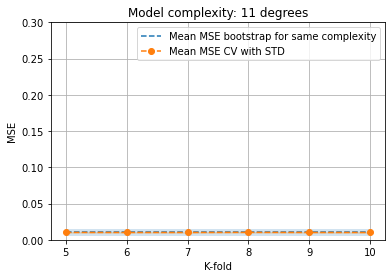

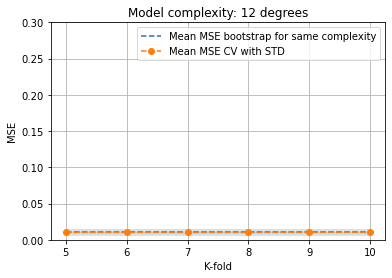

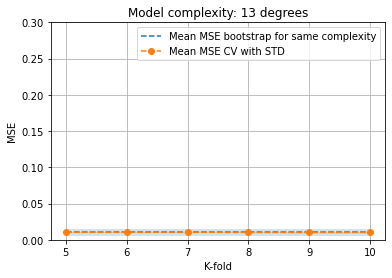

In [7]:
import numpy as np
from common import *
from sklearn.model_selection import cross_val_score
from sklearn import linear_model


#generate some data: 
np.random.seed(SEED_VALUE)
n = 15
x = np.sort(np.random.uniform(0, 1, n))
y = np.sort(np.random.uniform(0, 1, n))
x,y = np.meshgrid(x,y)
t = FrankeFunction(x, y) + noise_factor(n, factor=0.1)
ndegrees = 14

boot_strp_MSE_test, _, _, boot_strp_variance = bootstrap(x, y, t, ndegrees, 20, OLS())
boot_strp_std = np.sqrt(boot_strp_variance)


for degree in range(1,ndegrees):
    X = create_X(x,y,degree)


    mean_folds_error = np.zeros(6)
    mse_std_arr = np.zeros(6)
    for folds in range(5,11):
        #create LinearRegression model object from SK to use in sk.cross_val_score
        sk_model = linear_model.LinearRegression()
        #Get scores from SK crossval:
        sk_scores = cross_val_score(sk_model, X, t.ravel(), cv=folds, scoring = "neg_mean_squared_error")
        

        implemented_scores = cross_val(k = folds, model = "OLS", X = X, z = t, shuffle=True)
        # plt.plot(np.arange(1,folds+1), implemented_scores,"-o", label = f"Splitted in {folds} folds")
        # #plt.plot(np.arange(folds), sk_scores*-1,"--o", label = f"{folds} folds(sk.cv)")
        # plt.xlabel("MSE at testfold number")
        # plt.ylabel("MSE")
        # plt.title(f"Complexity degree: {degree} ")
        # plt.ylim(0,1)
        # plt.xticks(np.arange(1,folds+1))
        # plt.grid(True)
        # plt.legend()
        mean_folds_error[folds-5] = np.mean(implemented_scores)
        mse_std_arr[folds-5] = np.std(implemented_scores)
        
        
    #plt.errorbar(np.arange(5,11), mean_folds_error, yerr = mse_std_arr, fmt='c--', ecolor='deeppink', capthick=2)
    plt.plot(np.arange(5,11), np.ones(6)*boot_strp_MSE_test[degree],"--", label ="Mean MSE bootstrap for same complexity")
    plt.fill_between(np.arange(5,11), np.ones(6)*boot_strp_MSE_test[degree]-boot_strp_std[degree],
                     np.ones(6)*boot_strp_MSE_test[degree]+boot_strp_std[degree], alpha = 0.2 )
    plt.plot(np.arange(5,11), mean_folds_error, "o--",  label = "Mean MSE CV with STD")
    plt.fill_between(np.arange(5,11), mean_folds_error-mse_std_arr, mean_folds_error+mse_std_arr,  alpha = 0.2, color = "darkorange")
    plt.title(f"Model complexity: {degree} degrees")
    plt.xlabel("K-fold")
    plt.ylabel("MSE")
    plt.ylim(0,0.3)
    plt.xticks(np.arange(5,11))
    plt.grid(True)
    plt.legend()
    plt.show()


### Compare MSE from CV with bootstrap: 